# Predict the Score without to look for the past

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
import joblib

time_studied = np.array([20, 50, 32, 65, 23, 43, 10, 5, 22, 35, 29, 5, 56]).reshape(-1, 1)
scores = np.array([56, 83, 47, 93, 47, 82, 45, 23, 55, 67, 57, 4, 89]).reshape(-1, 1)

## Define the base ``test`` and ``train``

In [2]:
time_train, time_test, score_train, score_test = train_test_split(time_studied, # X
                                                                   scores , # Y
                                                                   test_size= 0.2) # 20% of the data will be used for [test] the model 

## Plot the graphic

Score: -2.4082333708846293


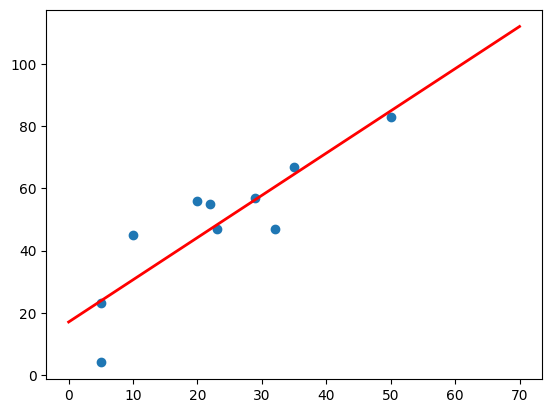

In [3]:
model = LinearRegression()
model.fit(X= time_train, y= score_train) # Model use to predict

print(f"Score: {model.score( X= time_test, y= score_test)}") # See if the score is good (the closer 1 the better)


plt.scatter(time_train ,score_train)
plt.plot(np.linspace(0, 70, 100).reshape(-1, 1),
         model.predict(np.linspace(0, 70, 100).reshape(-1, 1)),
         "r",
         linewidth=2)

## Implementing Cross-Validation

In [4]:
scores_predict = cross_val_predict( model, time_studied, scores, cv=5) # cv=5 do the cross of datas

print(f"Score Cross-Validation: {scores_predict}\n")
print(f"Medium Score of the Cross-Validation : {scores_predict.mean()}")

Score Cross-Validation: [[ 44.2256558 ]
 [ 82.85257259]
 [ 59.67642251]
 [103.29293291]
 [ 48.13481938]
 [ 74.40058773]
 [ 26.90379902]
 [ 20.00531046]
 [ 43.46017157]
 [ 62.87171425]
 [ 55.36184128]
 [ 32.10773481]
 [ 87.27820353]]

Medium Score of the Cross-Validation : 56.96705890945887


## Save the Model

In [5]:
joblib.dump(model, "Model_Predict_Score_Study.pkl")

['Model_Predict_Score_Study.pkl']

<!DOCTYPE html>
<html lang="pt-BR">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Estilo de Previsão</title>
    <style>
        .prediction-box {
            background-color: #1E90FF; 
            color: white;
            padding: 20px;
            border-radius: 15px; 
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2); 
            max-width: 400px; 
            margin: 20px auto; 
            text-align: center; 
        }
        h2{
            color: #000000;
            text-align: center;
            font-weight: bolder;
        }
    </style>
</head>
<body>

<div class="prediction-box">
    <h2>Predicting News Values</h2>
</div>

</body>
</html>


In [ ]:
model_loaded = joblib.load("Model_Predict_Score_Study.pkl")

new_data = np.array([float(x) for x in input("Pass the times of study (separated by spaces): ").split()]).reshape(-1, 1)
predict = model_loaded.predict(new_data)

print(f" Predicted SCORE for new data : {predict}")

 Predicted SCORE for new data : [[44.18977379]
 [57.77114866]
 [37.39908636]]
